In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Load Gambar**
variable img digunakan untuk membaca gambar yang tersimpan dalam folder.
gray merupakan variable untuk mengubah gambar berwarna menjadi hitam putih

In [85]:
img = cv2.imread('/kaggle/input/gambar/Rumah.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# **1. Amplifikasi intensitas (brightness)**
Tujuan:
Meningkatkan kecerahan gambar — membuat gambar terlihat lebih terang secara keseluruhan.

Cara kerja:
Menambahkan nilai konstan ke semua piksel RGB/gray image.

In [86]:
amplified = cv2.convertScaleAbs(img, alpha=1.5, beta=30)

# **2. Histogram Equalization (Meningkatkan kontras)**
Tujuan:
Meningkatkan kontras, terutama untuk gambar yang tampak "kusam" atau terlalu terang/gelap secara menyeluruh.

Cara kerja:
Menyesuaikan distribusi piksel agar lebih merata di seluruh rentang (0-255), sehingga detail di area gelap/terang jadi lebih kelihatan.

In [87]:
eq = cv2.equalizeHist(gray)

# **3. Sharpening Filter (Penajaman Citra)**
Tujuan:
Menonjolkan tepi objek atau detail dalam gambar, supaya terlihat lebih tajam.

Cara kerja:
Menggunakan konvolusi dengan kernel (biasanya dengan nilai tengah positif dan sisi negatif) untuk memperkuat perbedaan intensitas antara piksel pusat dan sekitarnya.

In [88]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, kernel)

# **Pergeseran (Shift)**
Tujuan: Memindahkan seluruh gambar ke posisi baru (kanan, kiri, atas, bawah).

Cara Kerja:
Menggunakan matriks transformasi affine untuk mengubah koordinat piksel.
Piksel (x, y) digeser ke (x + dx, y + dy).

In [89]:
rows, cols = img.shape[:2]
M_shift = np.float32([[1, 0, 20], [0, 1, 0]])  # Geser 20 piksel ke kanan
shifted = cv2.warpAffine(img, M_shift, (cols, rows))

# **Pertambahan**

In [90]:
added = cv2.add(img, amplified)

# **Visualisasi Hasil**
gambar 1 menampilkan gambar citra grayscale asli

gambar 2 menunjukkan hasil peningkatan cahaya

gambar 3 merupakah hasil peningkatan kontras

gambar 4 menampilkan gambar yang lebih tajam

gambar 5 merupakan gambar yang diubah posisinya

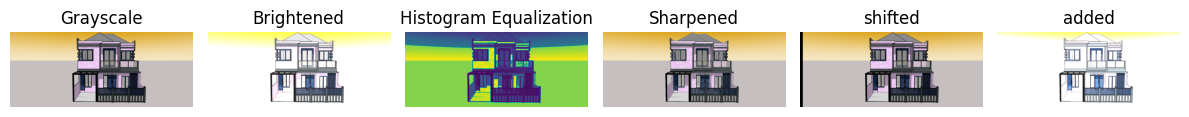

In [91]:
titles = ['Grayscale', 'Brightened', 'Histogram Equalization', 'Sharpened','shifted', 'added']
images = [img, amplified, eq, sharpened, shifted, added]

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()